## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

---

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.



1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [15]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')
sorted_categories = crosstab_result.sort_values(by=False, ascending=False)


sorted_categories

isBestSeller,False,True
category,,
eBook Readers & Accessories,1.000000,0.000000
Snowboard Boots,1.000000,0.000000
Motorbike Seat Covers,1.000000,0.000000
Blank Media Cases & Wallets,1.000000,0.000000
Boxes & Organisers,1.000000,0.000000
...,...,...
Power & Hand Tools,0.964661,0.035339
Mobile Phone Accessories,0.957529,0.042471
Health & Personal Care,0.942314,0.057686



2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.


In [17]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(3.9130707743346096, 1.0)

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

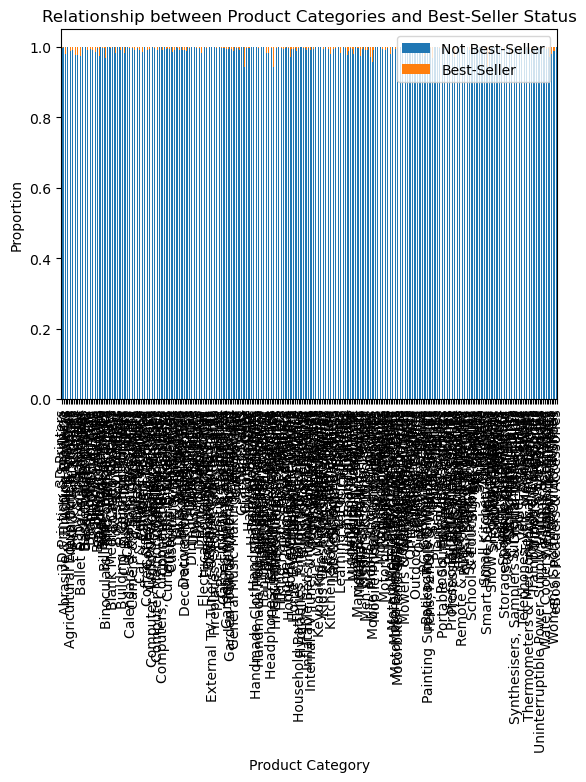

In [21]:
ax = crosstab_result.plot(kind='bar', stacked=True)

# Adding labels and title
ax.set_xlabel('Product Category')
ax.set_ylabel('Proportion')
ax.set_title('Relationship between Product Categories and Best-Seller Status')

# Adding legend
ax.legend(['Not Best-Seller', 'Best-Seller'], loc='upper right')
plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

In [11]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [27]:
df_less_out = df.loc[~df['price'].isin(tukeys_test_outliers(df['price']))]
df_less_out

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

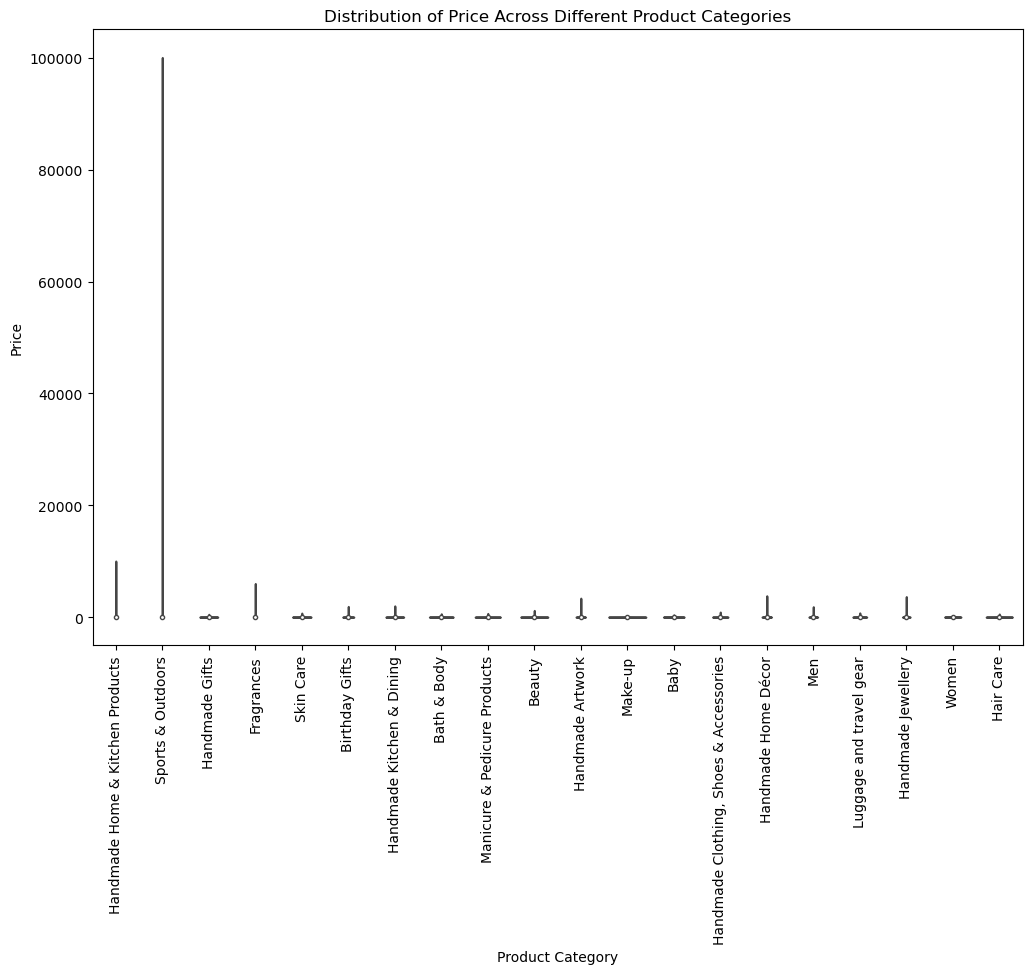

In [101]:
top_categories = df['category'].value_counts().nlargest(20).index
df_filtered = df[df['category'].isin(top_categories)]

plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=df_filtered)
plt.xticks(rotation=90);

# Adding labels and title
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.title('Distribution of Price Across Different Product Categories')
plt.show()


median_prices = df.groupby('category')['price'].median()
highest_median_category = median_prices.idxmax()

category
Men                                       20.990
Fragrances                                20.000
Sports & Outdoors                         18.320
Women                                     15.990
Handmade Jewellery                        15.600
Handmade Artwork                          14.990
Birthday Gifts                            13.990
Luggage and travel gear                   13.990
Baby                                      12.990
Handmade Gifts                            12.990
Handmade Kitchen & Dining                 12.000
Skin Care                                 12.000
Handmade Home Décor                       11.990
Bath & Body                               11.635
Handmade Home & Kitchen Products          10.990
Hair Care                                  9.970
Handmade Clothing, Shoes & Accessories     8.990
Beauty                                     8.990
Manicure & Pedicure Products               7.500
Make-up                                    7.000
Name: price

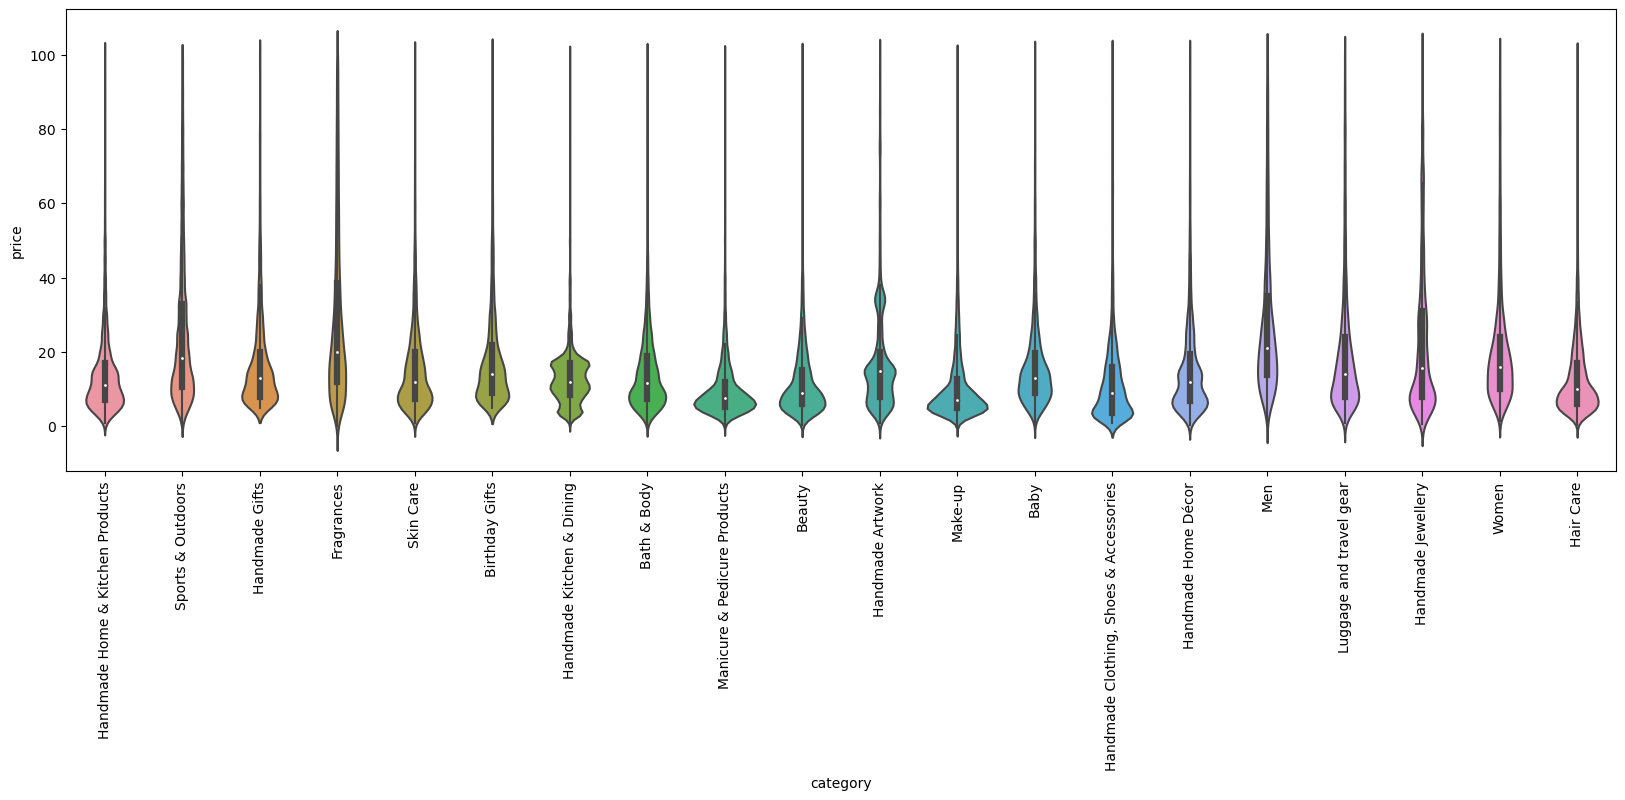

In [83]:
top_categories = df_less_out['category'].value_counts().nlargest(20).index
df_filtered = df_less_out[df_less_out['category'].isin(top_categories)]

plt.figure(figsize=(20, 6))
sns.violinplot(x='category', y='price', data=df_filtered)
plt.xticks(rotation=90);


df_filtered.groupby('category')['price'].median().sort_values(ascending=False)


In [49]:
median_prices = df.groupby('category')['price'].median()
highest_median_category = median_prices.idxmax()

median_prices, highest_median_category

(category
 3D Printers                       319.00
 3D Printing & Scanning             36.86
 Abrasive & Finishing Products      10.49
 Action Cameras                     60.77
 Adapters                            7.05
                                    ...  
 Wind Instruments                  126.79
 Window Treatments                  17.99
 Women                              16.49
 Women's Sports & Outdoor Shoes     61.64
 eBook Readers & Accessories        23.00
 Name: price, Length: 296, dtype: float64,
 'Laptops')

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.


The product category with the highest average price is: Sports & Outdoors


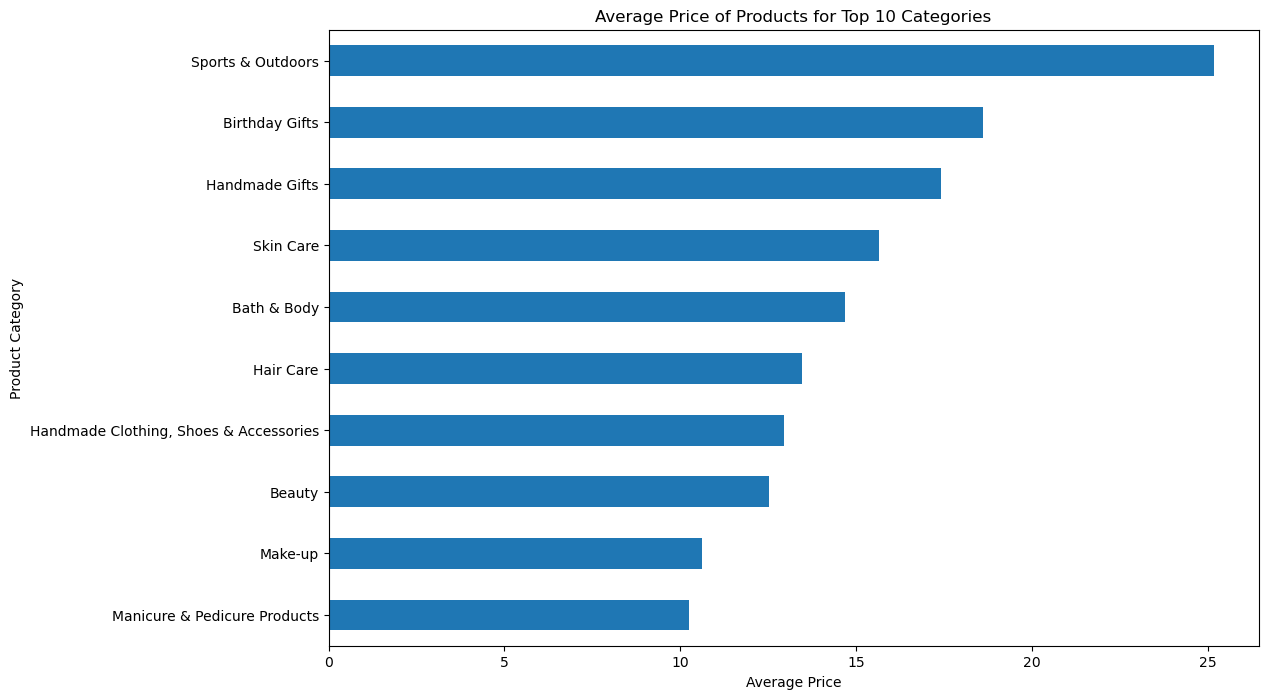

In [103]:
top_categories = df_less_out['category'].value_counts().nlargest(10).index
df_top_categories = df_less_out[df_less_out['category'].isin(top_categories)]

average_prices = df_top_categories.groupby('category')['price'].mean()

plt.figure(figsize=(12, 8))
average_prices.sort_values().plot(kind='barh')


plt.xlabel('Average Price')
plt.ylabel('Product Category')
plt.title('Average Price of Products for Top 10 Categories')


highest_avg_price_category = average_prices.idxmax()
print(f"The product category with the highest average price is: {highest_avg_price_category}")

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

The category that tends to receive the highest median rating is: Computer Memory


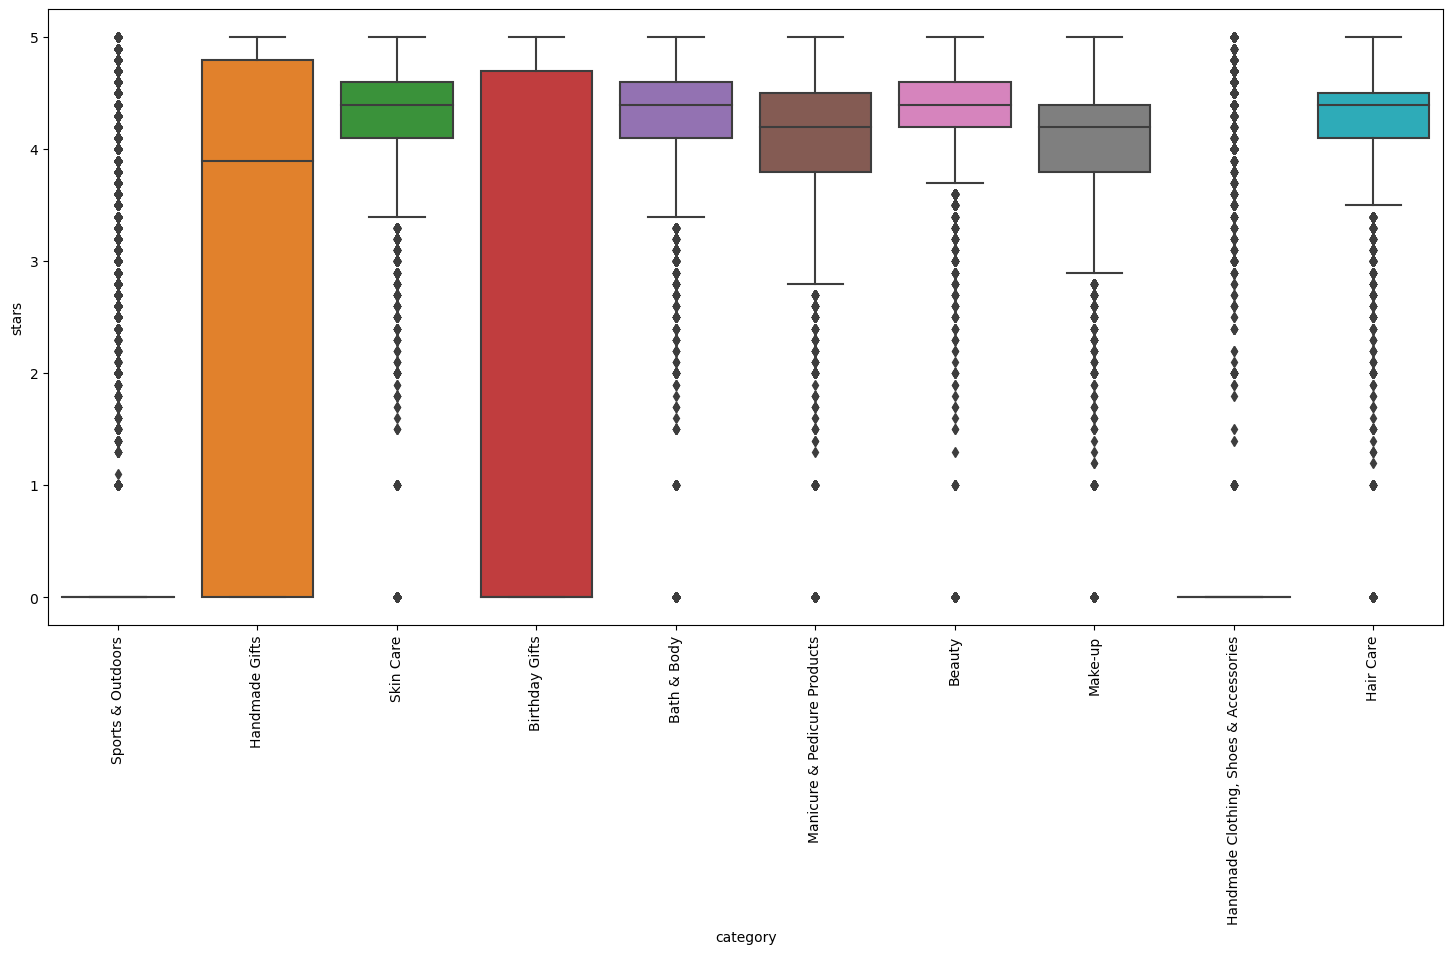

In [102]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='category', y='stars', data=df_top_categories)
plt.xticks(rotation=90);

median_ratings = df_less_out.groupby('category')['stars'].median()

median_ratings.sort_values(ascending=False)
highest_median_rating_category = median_ratings.idxmax()
print(f"The category that tends to receive the highest median rating is: {highest_median_rating_category}")

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?

In [104]:
correlation = df['price'].corr(df['stars'])

print(f'The correlation between product price and stars is {correlation} which is a weak negative correlation.')

The correlation between product price and stars is -0.12490673262159059 which is a weak negative correlation.


2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 


<Axes: xlabel='price', ylabel='stars'>

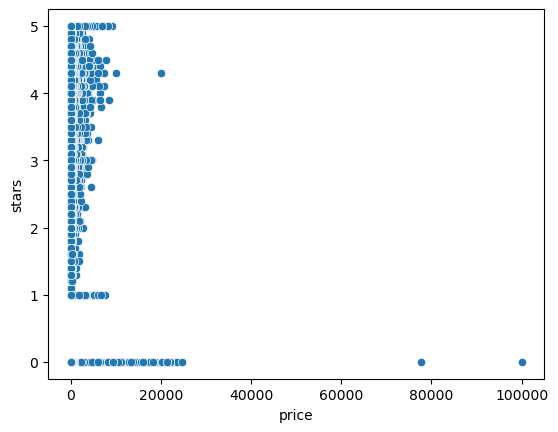

In [112]:
sns.scatterplot(data=df, x='price', y='stars')

In [105]:
sns.heatmap(correlation, annot=True, cmap="coolwarm")

ValueError: Must pass 2-d input. shape=()

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?
